In [1]:
import duckify as db
import pandas as pd


In [3]:
note_events_df = pd.read_csv("../mimicIII/mimic-iii-clinical-database-1.4/NOTEEVENTS.csv.gz")

C:\Users\ricej\AppData\Local\Temp\ipykernel_7204\2839028207.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  note_events_df = pd.read_csv("../mimicIII/mimic-iii-clinical-database-1.4/NOTEEVENTS.csv.gz")


In [4]:
note_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [1]:
import spacy

In [11]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion.")
for token in doc:
  print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion
.


In [3]:
tokens = doc.text.split()
print(tokens)

['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$1', 'billion.']


In [4]:
token_without_punct = [token.orth_ for token in doc if not token.is_punct | token.is_space]
print(token_without_punct)

['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion']


In [20]:
import os

In [22]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [24]:
doc = []
for i in range(len(notes)):
  doc.append(nlp(notes[i]))
  print(doc[-1])
  print('*************************************************************************************************************')

50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.

*************************************************************************************************************
23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed

In [25]:
# Lemmatization
doc = nlp("Apples and oranges are similar. Boots and hippos aren't.")
for token in doc:
  print(token, token.lemma, token.lemma_)

Apples 8566208034543834098 apple
and 2283656566040971221 and
oranges 2208928596161743350 orange
are 10382539506755952630 be
similar 18166476740537071113 similar
. 12646065887601541794 .
Boots 9918665227421442029 boot
and 2283656566040971221 and
hippos 4133693291145879083 hippos
are 10382539506755952630 be
n't 2043519015752540944 n't
. 12646065887601541794 .


In [7]:
from spacy import displacy

In [26]:
doc = []
for i in range(len(notes)):
  doc.append(nlp(notes[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print("*********************************************************")

50 year old 0 11 DATE
4 days ago 63 73 DATE
Tylenol 178 185 GPE
*********************************************************
23 0 2 CARDINAL
ESRD 21 25 ORG
RUE 71 74 ORG
BP 228 230 ORG
1131 256 260 DATE
BP 272 274 ORG
10-20 312 317 TIME
BP 369 371 ORG
BP 402 404 ORG
VNA 431 434 ORG
this past Friday 435 451 DATE
BP 457 459 ORG
today 560 565 DATE
GU/GI 727 732 ORG
*********************************************************
RH M h/o HTN 5 17 PERSON
CAD 37 40 ORG
PTCA 45 49 ORG
2 52 53 CARDINAL
2178 60 64 DATE
USOH 79 83 GPE
today 84 89 DATE
around noon 140 151 TIME
the computer half an hour 204 229 TIME
L foot 300 306 QUANTITY
911 814 817 CARDINAL
ICH 971 974 ORG
INR 979 982 ORG
2.89 987 991 CARDINAL
FFP 1021 1024 PRODUCT
IM 1036 1038 ORG
10 1050 1052 CARDINAL
1 1075 1076 CARDINAL
*********************************************************
49 year old 0 11 DATE
RV 54 56 ORG
ASD 88 91 ORG
CHF 132 135 ORG
the past one year 203 220 DATE
1016 518 522 DATE
11-25 546 551 TIME
TTE 607 610 ORG
ASD 733 7

In [27]:
for i in range(len(doc)):
  displacy.render(doc[i], style="ent", jupyter=True)
  print('*********************************************************************************************************************************************************************')

*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


In [28]:
#sentence identifier
for i in range(len(doc)):
  for ix, sent in enumerate(doc[i].sents, 1):
    print("Sentence number {}:{}".format(ix, sent))
  print('*******************************************************************************************')

Sentence number 1:50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head.
Sentence number 2:Since then she has had a massive headache" which did not resolve with Tylenol.
Sentence number 3:She states that she has a high threshold for pain and did not realize how bad it was during the day while at work
Sentence number 4:but then when she got home at night she noticed it.
Sentence number 5:The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning.
Sentence number 6:She reported that she had to check several times to make sure she did not put her clothes on backwards.
Sentence number 7:She has had some dizziness, but no nausea or vomiting.
Sentence number 8:Her speech has not been affected.

*******************************************************************************************
Sentence number 1:23 F with h/o
Sentence number 2:Lupus

In [29]:
# dependence tree
for i in range(len(doc)):
  sentence_spans = list(doc[i].sents)
  displacy.render(sentence_spans, style="dep", jupyter=True)

In [30]:
doc = nlp("I love apple")
for word in doc:
  lexeme = doc.vocab[word.text]
  print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_, lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

I 4690420944186131903 X I I True False True en
love 3702023516439754181 xxxx l ove True False False en
apple 8566208034543834098 xxxx a ple True False False en


In [31]:
import scispacy
import spacy

In [33]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [1]:
import spacy

In [36]:
import en_core_sci_md

In [37]:
nlp = en_core_sci_md.load()

In [38]:
doc = []
for i in range(len(notes)):
  doc.append(nlp(notes[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print("****************************************************************************************************")

year 3 7 ENTITY
female 12 18 ENTITY
bathtub 4 55 64 ENTITY
days 65 69 ENTITY
head 102 106 ENTITY
massive headache 133 149 ENTITY
Tylenol 178 185 ENTITY
states 191 197 ENTITY
threshold 218 227 ENTITY
pain 232 236 ENTITY
day 283 286 ENTITY
home 323 327 ENTITY
night 331 336 ENTITY
patient 357 364 ENTITY
vision 399 405 ENTITY
finding 454 461 ENTITY
tags 466 470 ENTITY
clothing 490 498 ENTITY
morning 506 513 ENTITY
clothes 597 604 ENTITY
backwards 608 617 ENTITY
dizziness 636 645 ENTITY
nausea 654 660 ENTITY
vomiting 664 672 ENTITY
speech 678 684 ENTITY
affected 698 706 ENTITY
****************************************************************************************************
F 3 4 ENTITY
h/o Lupus 10 19 ENTITY
ESRD 21 25 ENTITY
HD 33 35 ENTITY
planned PD 37 47 ENTITY
labile hypertension 50 69 ENTITY
RUE 71 74 ENTITY
VTE 75 78 ENTITY
anticoagulation 82 97 ENTITY
facial swelling 106 121 ENTITY
hypertensive emergency 140 162 ENTITY
Patient 164 171 ENTITY
severe 182 188 ENTITY
frontal HA last 

In [39]:
for i in range(len(doc)):
  displacy.render(doc[i], style="ent", jupyter=True)
  print("************************************************************************************************************************************************")

************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


In [42]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
nlp = spacy.load('en_core_web_sm')

In [44]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [45]:
df=notes

In [46]:
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['50 year old', '4 days ago', 'Tylenol'], ['23', 'ESRD', 'RUE', 'BP', '1131', 'BP', '10-20', 'BP', 'BP', 'VNA', 'this past Friday', 'BP', 'today', 'GU/GI'], ['RH M h/o HTN', 'CAD', 'PTCA', '2', '2178', 'USOH', 'today', 'around noon', 'the computer half an hour', 'L foot', '911', 'ICH', 'INR', '2.89', 'FFP', 'IM', '10', '1'], ['49 year old', 'RV', 'ASD', 'CHF', 'the past one year', '1016', '11-25', 'TTE', 'ASD', 'PFO', '121', '6', 'CHF'], ['83 year old', 'this morning', '7:45 PM', 'the day', '2171-9-25', '18'], ['72 year old', 'CAD', 'ED', '2 minute', 'EMS', '11:28 am', 'this morning', 'SOB', '240/120', 'RA', 'FSBG', '330', 'x3', '18', 'ED', 'FSBG', '328', '12:20 pm', 'ED', 'ED', 'ED', 'One minute later', '2 minutes'], ['46', '151', '2 weeks', 'two weeks', 'SOB', 'two', '1459', '13x8 cm', 'SVC', '18', 'Name2', 'NI', '499'], ['17 year old', 'RH', 'PANDAS', 'several years', '2 weeks'], ['82 year old', 'CHF', 'AAA', '43', '4', '3 days', '3 days', 'at least a few days'], ['27', '3-29', '18

In [48]:
from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=1)

In [50]:
model1.wv['Tylenol']

array([ 0.00479961, -0.00362934, -0.00426249,  0.00121923, -0.00412497,
       -0.00563074,  0.00314388,  0.00834311, -0.00654714, -0.00911628,
       -0.00333046,  0.00752595, -0.00968762,  0.00959802, -0.00041455,
        0.00230814, -0.00184922, -0.00576697,  0.0030987 ,  0.00619369,
       -0.00705095, -0.00117252,  0.00155792,  0.00424832,  0.0071385 ,
       -0.00354926,  0.00727332, -0.00557349, -0.00219276,  0.00908416,
        0.00538339, -0.00848433, -0.00165807, -0.00883947, -0.00163993,
        0.00565965, -0.00741761,  0.00550874,  0.00609042, -0.00377584,
       -0.0096556 , -0.0025209 , -0.00255098,  0.00376423,  0.00892464,
        0.00199419, -0.00211237,  0.00296828, -0.00679894, -0.00129123,
       -0.00148116,  0.0096044 , -0.0058119 , -0.00703792,  0.0023596 ,
        0.00263766, -0.00714192, -0.00587926, -0.00118463, -0.00330579,
       -0.00897653, -0.00404561, -0.0029674 ,  0.00650159,  0.00097118,
        0.00160486,  0.0002746 , -0.00338126,  0.00310434,  0.00

In [51]:
model1.wv.similar_by_word('Tylenol') #please read the below note for explaination of following output

[('499', 0.28613051772117615),
 ('101.5', 0.18286950886249542),
 ('240/120', 0.1629738062620163),
 ('ICH', 0.15634340047836304),
 ('4 days ago', 0.14898346364498138),
 ('13x8 cm', 0.1259385645389557),
 ('the past one year', 0.09841710329055786),
 ('OSA', 0.08822767436504364),
 ('27', 0.08798963576555252),
 ('180-200/120-130', 0.08454123884439468)]

In [62]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=np.min([30, len(words)-1]), early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [54]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Replace 4 with the number of logical cores you want


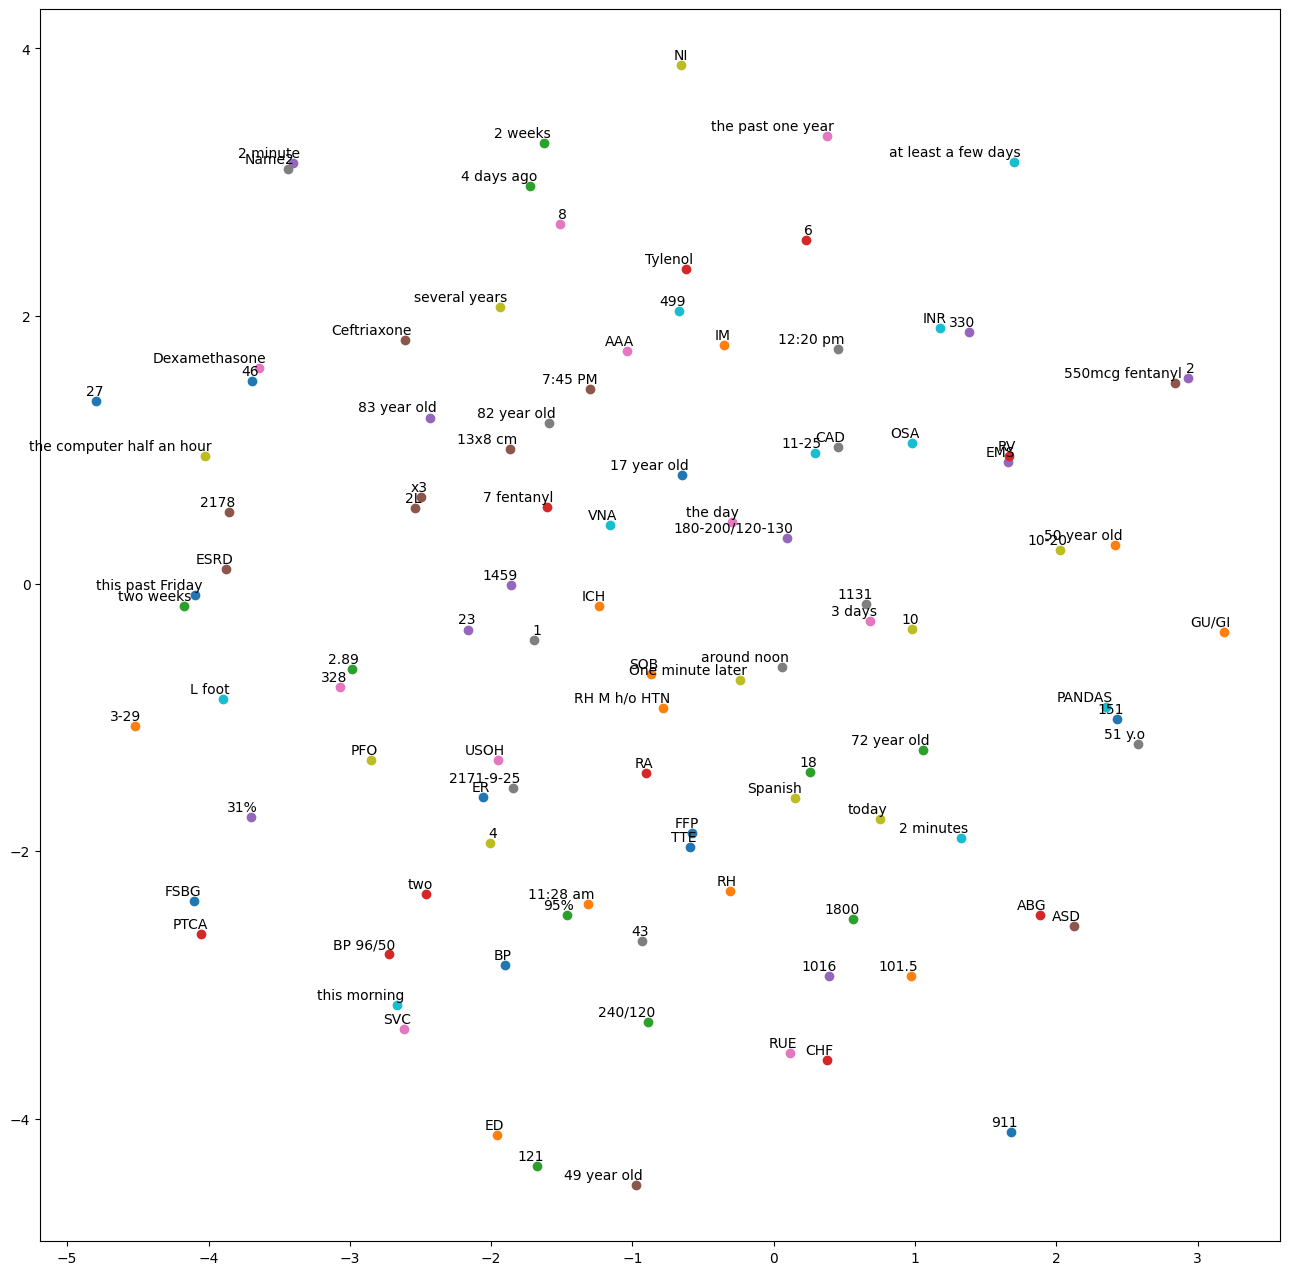

In [55]:
vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)

In [56]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

[==================================================] 100.0% 66.0/66.0MB downloaded


In [57]:
# queen = (king - man) + woman
result=pretrained_model.most_similar(positive=['woman','king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523604273796082)]


In [58]:
pretrained_model.most_similar("headache")

[('headaches', 0.8957463502883911),
 ('fatigue', 0.8547418117523193),
 ('pains', 0.8367806673049927),
 ('aches', 0.8088535070419312),
 ('nausea', 0.8022516965866089),
 ('discomfort', 0.7890003323554993),
 ('pain', 0.7766653895378113),
 ('anxiety', 0.7692658305168152),
 ('symptom', 0.7564830780029297),
 ('migraine', 0.7536172866821289)]

In [59]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

BP
ED
CHF
EMS
ASD
3 days
CAD
this morning
FSBG
SOB
2 weeks
RV
49 year old
the past one year
PFO
TTE
IM
83 year old
7:45 PM
the day
2171-9-25
INR
FFP
GU/GI
4 days ago
Tylenol
ESRD
RUE
VNA
this past Friday
RH M h/o HTN
PTCA
2178
USOH
around noon
the computer half an hour
L foot
ICH
72 year old
BP 96/50
2 minute
2L
AAA
at least a few days
7 fentanyl
180-200/120-130
550mcg fentanyl
51 y.o
Spanish
OSA
ER
95%
ABG
31%
Ceftriaxone
Dexamethasone
82 year old
several years
PANDAS
11:28 am
240/120
RA
12:20 pm
One minute later
2 minutes
RH
two weeks
13x8 cm
SVC
Name2
NI
17 year old
50 year old


In [64]:
len(corpus_in_pretrained_model)

29

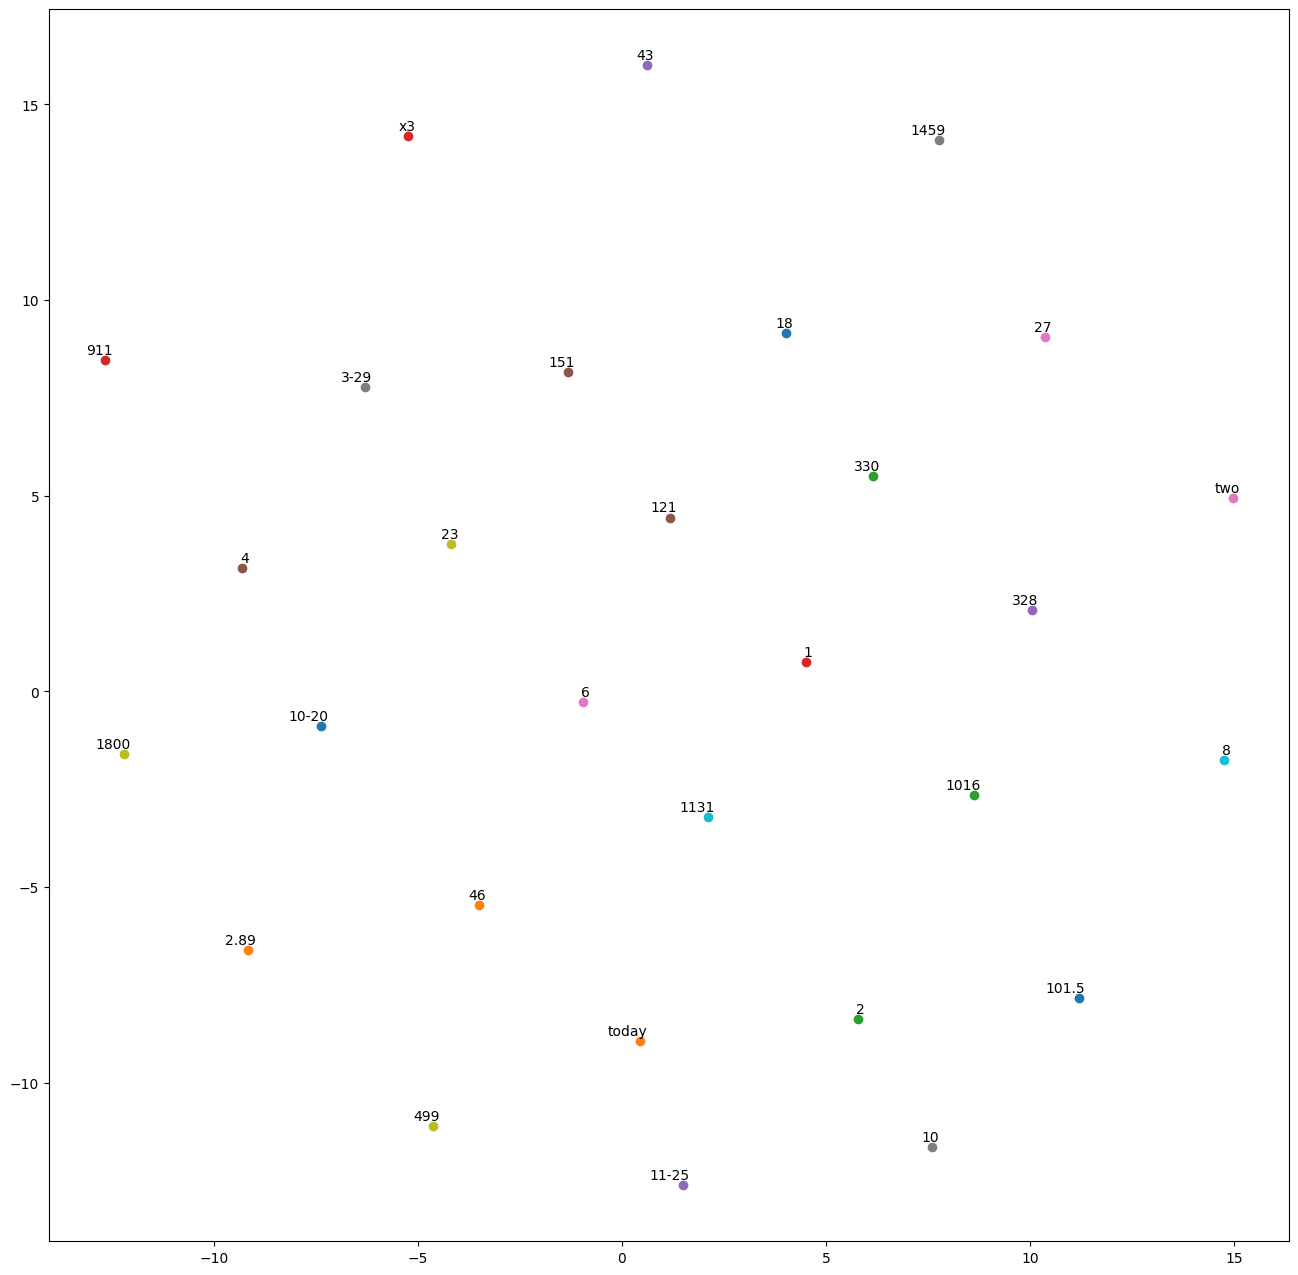

In [65]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)

In [66]:
nlp = spacy.load("en_ner_bc5cdr_md")

In [67]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [68]:
df=notes

In [69]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['headache', 'Tylenol', 'pain', 'dizziness', 'nausea', 'vomiting'], ['ESRD', 'HD', 'hypertension', 'VTE', 'hypertensive', 'a/w nausea', 'a/w nausea', 'CP', 'shortness of breath', 'abd pain', 'weakness', 'dizziness', 'speach', 'numbness', 'UA'], ['62yo RH M h/o', 'HTN', 'coumadin', 'CAD', 'USOH', 'right-sided headache', 'photophobia', 'nausea', 'slurred', 'stroke', 'ICH', 'vit K', 'labetalol', 'dilantin', "d/c'd", 'hypotension'], ['lupus', 'pulmonary hypertension', 'RV enlargement', 'CHF/pulm', 'dyspnea', 'dyspnea', 'Pt', 'pulmonary hypertension', 'dilated right ventricle and R to L', 'p-MIBI', 'volume overload', 'CHF'], ['stroke'], ['CAD', 'hypertension', 'DM2', 'hyperlipidemia', 'CKD stage IV', 'aphasia', 'seizure', 'shakiness', 'diaphoresis', 'chest pain', 'SOB', 'nausea/vomiting', 'cough', 'RA', 'FSBG', 'FSBG', 'rigors', 'Stroke', 'seizure', 'right horizontal nystagmus', 'tremor', 'clonic movements', 'bowel/bladder incontinence', 'Ativan', 'seizure', 'seizure', 'code stroke'], ['PC